In [27]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import skcuda.fft as cu_fft
import math
import cmath
%matplotlib inline

In [65]:
f1=50
A1=1
phase1=0
f2=78
A2=0
phase2=0
f3=143
A3=0
phase3=0
w1=2*math.pi*f1
w2=2*math.pi*f2
w3=2*math.pi*f3

In [66]:
N=1<<7
print(N)
ys=[]

128


In [67]:
ys=[]
for j in range(0,N):
    #math.sin(2*math.pi*f1*i)
    i=j/60
    y = A1*math.sin(2*math.pi*f1*i+phase1)+A2*math.sin(2*math.pi*f2*i+phase2)+A3*math.sin(2*math.pi*f3*i+phase3)
    ys.append(y)

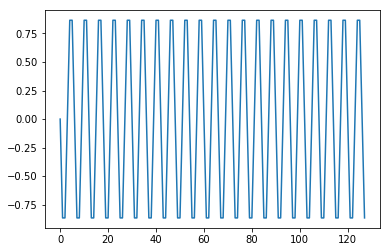

In [68]:
plt.plot(ys)

In [69]:
x_np = np.array(ys)

In [70]:
xf=np.fft.fft(x_np)

In [71]:
xf

array([ -0.86602540 +0.00000000e+00j,  -0.86916246 +4.25964711e-02j,
        -0.87865750 +8.57107752e-02j,  -0.89476784 +1.29883913e-01j,
        -0.91794183 +1.75705436e-01j,  -0.94885084 +2.23843635e-01j,
        -0.98843995 +2.75083950e-01j,  -1.03800481 +3.30380583e-01j,
        -1.09930722 +3.90928965e-01j,  -1.17475034 +4.58271517e-01j,
        -1.26764949 +5.34457737e-01j,  -1.38266274 +6.22295819e-01j,
        -1.52650041 +7.25764772e-01j,  -1.70914732 +8.50722158e-01j,
        -1.94608687 +1.00618986e+00j,  -2.26263378 +1.20685702e+00j,
        -2.70314271 +1.47839784e+00j,  -3.35296894 +1.87015157e+00j,
        -4.39995984 +2.49062553e+00j,  -6.35406957 +3.63429040e+00j,
       -11.25524228 +6.47895256e+00j, -45.62320472 +2.63358236e+01j,
        23.14087820 -1.33510330e+01j,   9.39870931 -5.40326249e+00j,
         5.96947755 -3.41001770e+00j,   4.41510129 -2.49954125e+00j,
         3.53015908 -1.97585620e+00j,   2.96012930 -1.63425472e+00j,
         2.56321420 -1.39284685e+0

/home/cmoman/anaconda3/envs/snowflakes/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


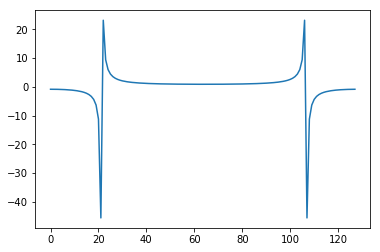

In [73]:
plt.plot(xf)

In [76]:
x_gpu = gpuarray.to_gpu(x_np)
batch_size = 16
xf_gpu = gpuarray.empty((batch_size, N//2+1), np.complex64)
plan_forward = cu_fft.Plan(N, np.float32, np.complex64, batch_size)
cu_fft.fft(x_gpu, xf_gpu, plan_forward)

/home/cmoman/anaconda3/envs/snowflakes/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


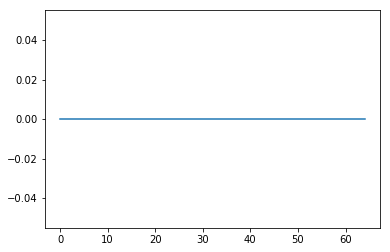

In [86]:
plt.plot(xf_gpu.get()[4])

In [19]:
from __future__ import print_function

import pycuda.autoinit
import pycuda.gpuarray as gpuarray

import skcuda.fft as cu_fft

print('Testing fft/ifft..')
N = 4096 * 16
batch_size = 16

x = np.asarray(np.random.rand(batch_size, N), np.float32)
xf = np.fft.fft(x)
y = np.real(np.fft.ifft(xf))

x_gpu = gpuarray.to_gpu(x)
xf_gpu = gpuarray.empty((batch_size, N//2+1), np.complex64)
plan_forward = cu_fft.Plan(N, np.float32, np.complex64, batch_size)
cu_fft.fft(x_gpu, xf_gpu, plan_forward)

y_gpu = gpuarray.empty_like(x_gpu)
plan_inverse = cu_fft.Plan(N, np.complex64, np.float32, batch_size)
cu_fft.ifft(xf_gpu, y_gpu, plan_inverse, True)

print('Success status: ', np.allclose(y, y_gpu.get(), atol=1e-6))

print('Testing in-place fft..')
x = np.asarray(np.random.rand(batch_size, N) +
               1j * np.random.rand(batch_size, N), np.complex64)
x_gpu = gpuarray.to_gpu(x)

plan = cu_fft.Plan(N, np.complex64, np.complex64, batch_size)
cu_fft.fft(x_gpu, x_gpu, plan)

cu_fft.ifft(x_gpu, x_gpu, plan, True)

print('Success status: ', np.allclose(x, x_gpu.get(), atol=1e-6))

Testing fft/ifft..
Success status:  True
Testing in-place fft..
Success status:  True


In [21]:
type(temp)

pandas.core.series.Series

In [22]:
type(temp_fft)

numpy.ndarray

In [28]:
temp[col]

NameError: name 'col' is not defined

In [25]:
h1

<bound method NDFrame.to_xarray of DATE
1994-01-01     9.886111
1994-01-02    11.707895
1994-01-03    12.661111
1994-01-04    11.894737
1994-01-05    10.283333
1994-01-06    11.789474
1994-01-07     8.491667
1994-01-08     8.684211
1994-01-09    11.207500
1994-01-10     9.727778
1994-01-11     9.613889
1994-01-12    11.869444
1994-01-13    12.226471
1994-01-14    11.558333
1994-01-15    10.920000
1994-01-16     9.465789
1994-01-17     5.467647
1994-01-18     6.405263
1994-01-19     5.965789
1994-01-20     6.534211
1994-01-21     8.687500
1994-01-22     9.672500
1994-01-23     9.458333
1994-01-24    10.826471
1994-01-25    14.192105
1994-01-26    10.785294
1994-01-27    11.558333
1994-01-28    10.836111
1994-01-29     9.405556
1994-01-30    10.657895
                ...    
2013-12-02     9.112500
2013-12-03    14.356250
2013-12-04     9.000000
2013-12-05    14.691667
2013-12-06     9.425000
2013-12-07    10.891667
2013-12-08    12.390000
2013-12-09    10.621429
2013-12-10     7.588889


In [35]:
t_gpu = gpuarray.to_gpu(temp2)


In [36]:
tf_gpu = gpuarray.empty((batch_size, N//2+1), np.complex64)
plan_forward = cu_fft.Plan(N, np.float32, np.complex64, batch_size)
cu_fft.fft(t_gpu, tf_gpu, plan_forward)

In [37]:
tf_gpu.get()

array([[             nan            +nanj,
                     nan            +nanj,
                     nan            +nanj, ...,
                     nan            +nanj,
                     nan            +nanj,
                     nan            +nanj],
       [  3.03602887e+38 +7.09884336e+31j,
          1.01715311e+38 -1.63889615e+37j,
          3.58744486e+37 -3.45342808e+37j, ...,
          3.58744790e+37 +3.45343213e+37j,
          1.01715321e+38 +1.63889780e+37j,
          3.03602846e+38 -2.40853614e+31j],
       [  7.45717087e+01 +7.62939453e-06j,
          7.45018845e+01 -3.65767002e+00j,
          7.42907562e+01 -7.32403183e+00j, ...,
          2.88473845e+00 -3.97625089e+00j,
          2.42204428e+00 -2.00461221e+00j,
          2.26749611e+00 -2.47955322e-05j],
       ..., 
       [  3.62651636e+03 +3.33547592e-04j,
         -1.28534861e+01 +1.14129791e+01j,
         -1.98933372e+01 -3.07429962e+01j, ...,
         -1.29579830e+01 +2.67077885e+01j,
         -4.981640